In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic=sns.load_dataset('titanic')

In [6]:
titanic['embark_town'].isnull().sum()

2

In [7]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

<BarContainer object of 3 artists>

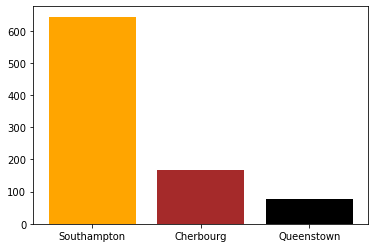

In [18]:
#plot the bar plot
plt.bar(list(titanic['embark_town'].value_counts().keys()),list(titanic['embark_town'].value_counts())
       ,color=['orange','brown','black'])

In [19]:
#now we are replaced the Nan values with missing and then plot the graph
titanic['embark_town'].fillna('Missing',inplace=True)

In [20]:
#no Nan more any more but still there is missing values is present 
titanic['embark_town'].isnull().sum()

0

In [21]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Missing          2
Name: embark_town, dtype: int64

<BarContainer object of 4 artists>

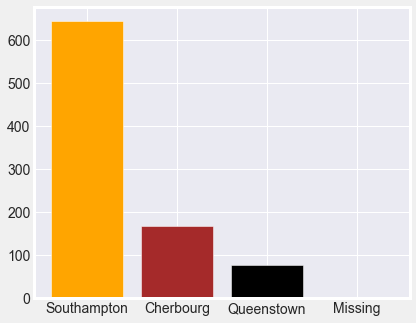

In [29]:
#this is the bar graph with missing  values
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,5))
plt.rcParams['figure.figsize']=[6,5]
sns.set_style('darkgrid')
plt.bar(list(titanic['embark_town'].value_counts().keys()),list(titanic['embark_town'].value_counts())
       ,color=['orange','brown','black','yellow'])
#as you can see there we have almost negligible bar graph for missing

#  Categorical Data Encoding
 One Hot Encoding

In [33]:
one_hot_enconding=titanic[['sex','class','embark_town']]
one_hot_enconding

In [39]:
#lets print the unique values from these columns
print(one_hot_enconding['sex'].unique())
print(one_hot_enconding['class'].unique())
print(one_hot_enconding['embark_town'].unique())

['male' 'female']
['Third', 'First', 'Second']
Categories (3, object): ['Third', 'First', 'Second']
['Southampton' 'Cherbourg' 'Queenstown' 'Missing']


In [41]:
#The easiest way to convert a column into one hot-encoded column is by using the
#get_dummies() method of the Pandas dataframe.
temp=pd.get_dummies(titanic['sex'])
temp.head(2)

,female,male
0,0,1
1,1,0


In [45]:
#Let’s display the actual sex name and the one hot encoded version for 
#the sex column in the same dataframe.
pd.concat([titanic['sex'],temp],axis=1).head()

,sex,female,male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1


In [46]:
pd.concat([titanic['class'],pd.get_dummies(titanic['class'])],axis=1).head()

,class,First,Second,Third
0,Third,0,0,1
1,First,1,0,0
2,Third,0,0,1
3,First,1,0,0
4,Third,0,0,1


# disadvantage
A major drawback of this approach is that the feature space can become very large since a categorical column can have a lot of unique values.

# label encoder
for integer encoding use sklearn

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(titanic['class'])
titanic['le_class']=le.transform(titanic['class'])

In [73]:
titanic
# It is important to mention that label encoding starts from 0
#they labeled second is 1 first is 0 and third is 2

,sex,class,embark_town,le_class
0,male,Third,Southampton,2
1,female,First,Cherbourg,0
2,female,Third,Southampton,2
3,female,First,Southampton,0
4,male,Third,Southampton,2
...,...,...,...,...
886,male,Second,Southampton,1
887,female,First,Southampton,0
888,female,Third,Southampton,2
889,male,First,Cherbourg,0
